<a href="https://colab.research.google.com/github/Hasifa1/Machine-learning-models/blob/main/maleria_all_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/outbreak_detect.csv')

In [ ]:
df.head()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
0,29.0,18.0,49.74,0.00,2156,112,No
1,34.0,23.0,83.27,15.22,10717,677,Yes
2,40.0,23.0,50.74,0.00,1257,127,No
3,NaN,24.0,84.57,11.15,9693,482,No
4,34.0,24.0,59.16,9.06,4198,211,No


In [ ]:
df.tail()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
21,31.0,23.0,73.35,4.97,10659,612,Yes
22,30.0,23.0,86.81,7.21,9041,418,No
23,30.0,22.0,78.80,3.12,11265,404,Yes
24,33.0,22.0,73.71,1.75,9233,212,No
25,1.0,24.0,84.57,11.15,9693,482,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   maxTemp      24 non-null     float64
 1   minTemp      25 non-null     float64
 2   avgHumidity  26 non-null     float64
 3   Rainfall     26 non-null     float64
 4   Positive     26 non-null     int64  
 5   pf           26 non-null     int64  
 6   Outbreak     25 non-null     object 
dtypes: float64(4), int64(2), object(1)
memory usage: 1.5+ KB


In [ ]:
df.describe()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf
count,24.000000,25.000000,26.000000,26.000000,26.000000,26.000000
mean,33.458333,23.960000,69.611538,7.035769,7951.307692,412.346154
std,8.203812,2.805946,15.378182,9.233042,3617.947006,217.488564
min,1.000000,18.000000,34.740000,0.000000,416.000000,26.000000
25%,31.000000,23.000000,57.915000,0.095000,5487.500000,213.000000
50%,33.500000,24.000000,73.290000,4.095000,9271.500000,414.000000
75%,36.750000,24.000000,84.245000,11.150000,10702.500000,532.250000
max,45.000000,32.000000,88.770000,41.400000,13154.000000,838.000000


In [ ]:
df.shape

(26, 7)

In [ ]:
df.isnull().sum()

maxTemp        2
minTemp        1
avgHumidity    0
Rainfall       0
Positive       0
pf             0
Outbreak       1
dtype: int64

In [ ]:
import math
mean_mxt=df['maxTemp'].mean()

In [ ]:
mean_mxt=math.floor(mean_mxt)
mean_mxt

33

In [ ]:
df['maxTemp']=df['maxTemp'].fillna(mean_mxt)

In [ ]:
mean_mnt=df['minTemp'].mean()
mean_mnt=math.floor(mean_mnt)
mean_mnt

23

In [ ]:
df['minTemp']=df['minTemp'].fillna(mean_mnt)

In [ ]:
df.isnull().sum()

maxTemp        0
minTemp        0
avgHumidity    0
Rainfall       0
Positive       0
pf             0
Outbreak       1
dtype: int64

In [ ]:
#data preprocessing
from sklearn import preprocessing
LE=preprocessing.LabelEncoder()
#fitting the technique to dataset
df.Outbreak=LE.fit_transform(df.Outbreak)

In [ ]:
df.tail()

,maxTemp,minTemp,avgHumidity,Rainfall,Positive,pf,Outbreak
21,31.0,23.0,73.35,4.97,10659,612,1
22,30.0,23.0,86.81,7.21,9041,418,0
23,30.0,22.0,78.80,3.12,11265,404,1
24,33.0,22.0,73.71,1.75,9233,212,0
25,1.0,24.0,84.57,11.15,9693,482,2


In [ ]:
df=df.drop(25,axis=0)

In [ ]:
#df=df.drop(['Positive','pf'],axis=1)

**Visualisation**

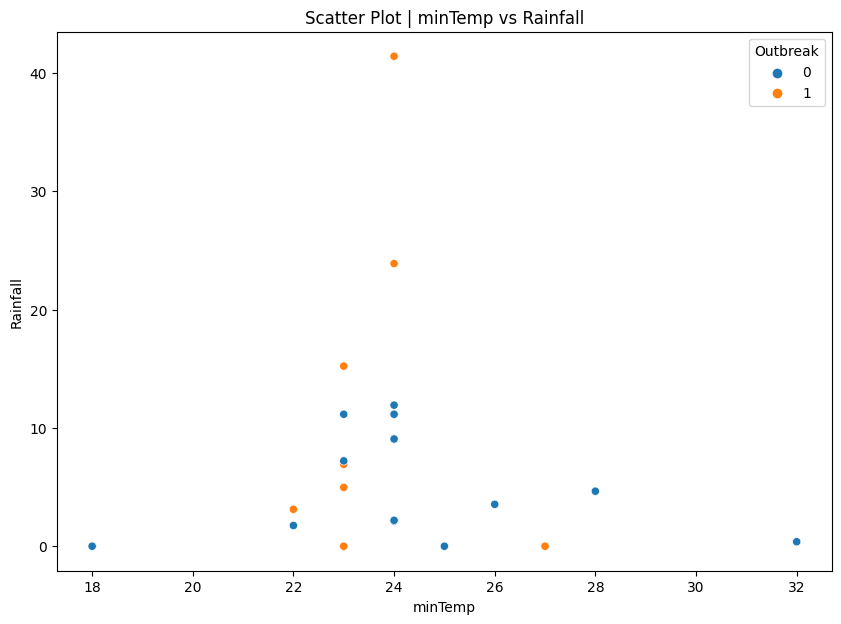

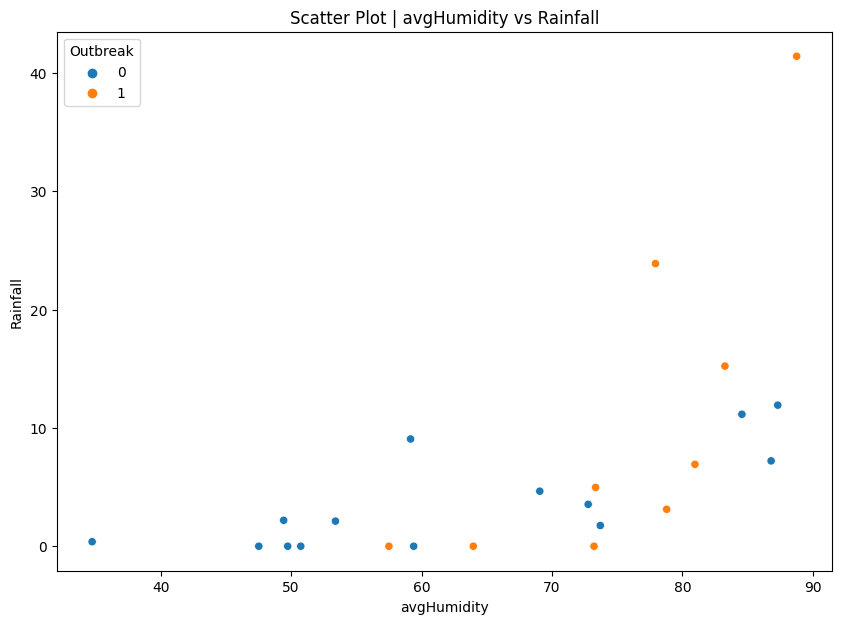

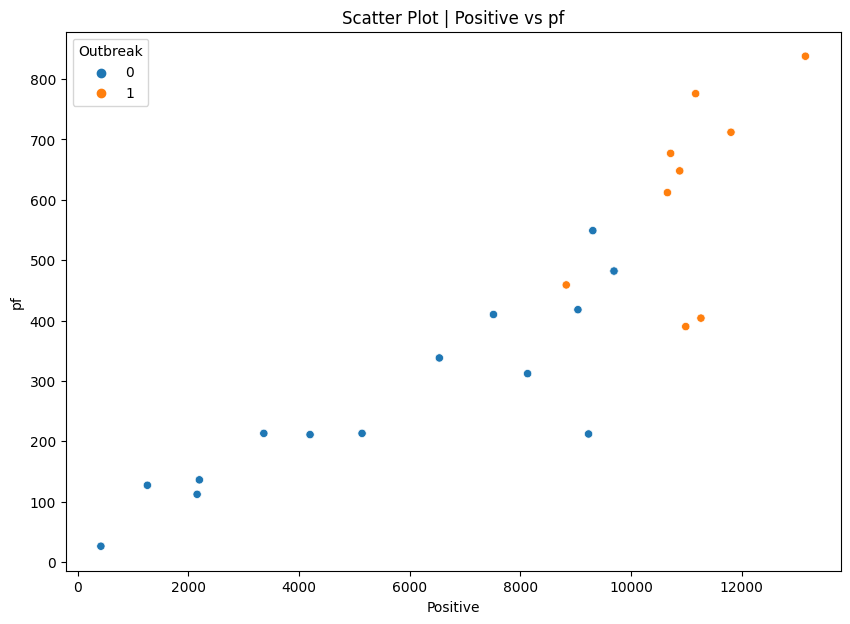

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_vs(frame,col1,col2,hue):
  plt.figure(figsize=(10,7))
  sns.scatterplot(data=frame,x=col1,y=col2,hue=hue)
  plt.title(f"Scatter Plot | {col1} vs {col2}")
plot_vs(df,'minTemp','Rainfall','Outbreak')
plot_vs(df,'avgHumidity','Rainfall','Outbreak')
plot_vs(df,'Positive','pf','Outbreak')

In [ ]:
df=df.drop(['Positive','pf'],axis=1)

In [ ]:
#splitting the data
X=df.iloc[:,:-1]
Y=df.iloc[:,-1:]

In [ ]:
X


,maxTemp,minTemp,avgHumidity,Rainfall
0,29.0,18.0,49.74,0.00
1,34.0,23.0,83.27,15.22
2,40.0,23.0,50.74,0.00
3,33.0,24.0,84.57,11.15
4,34.0,24.0,59.16,9.06
5,34.0,27.0,73.23,0.00
6,31.0,24.0,88.77,41.40
7,33.0,24.0,77.94,23.88
8,31.0,24.0,84.57,11.15
9,36.0,24.0,53.40,2.12


In [ ]:
Y

,Outbreak
0,0
1,1
2,0
3,0
4,0
5,1
6,1
7,1
8,0
9,0


In [ ]:
#splitting the data set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)


In [ ]:
X_train

,maxTemp,minTemp,avgHumidity,Rainfall
9,36.0,24.0,53.40,2.12
13,45.0,32.0,34.74,0.38
1,34.0,23.0,83.27,15.22
22,30.0,23.0,86.81,7.21
5,34.0,27.0,73.23,0.00
2,40.0,23.0,50.74,0.00
12,42.0,24.0,49.43,2.19
15,33.0,23.0,80.97,6.92
3,33.0,24.0,84.57,11.15
4,34.0,24.0,59.16,9.06


In [ ]:
X_test

,maxTemp,minTemp,avgHumidity,Rainfall
8,31.0,24.0,84.57,11.15
16,32.0,24.0,87.32,11.92
0,29.0,18.0,49.74,0.00
23,30.0,22.0,78.80,3.12
11,34.0,18.0,59.40,0.00


In [ ]:
#normalizing the data-standard scalar
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(X_train)#normalizing
X_test=sst.transform(X_test)

**Logistic regression**

In [ ]:
#fitting the data
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
ypred=model.predict(sst.transform(X_test))

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
accuracy_train=model.score(X_train,Y_train)
print("Training accuracy:",accuracy_train)

Training accuracy: 0.65


In [ ]:
accuracy_test=model.score(X_test,Y_test)
print("Testing accuracy:",accuracy_test)

Testing accuracy: 0.6


In [ ]:
accuracy=model.score(sst.transform(X),Y)
print("overall accuracy:",accuracy)

overall accuracy: 0.64


In [ ]:
print(model.score(sst.transform(X),Y)*100)


64.0


**Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

In [ ]:
nb.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
print("Training Accuracy",nb.score(X_train,Y_train))
print("Testing Accuracy",nb.score(X_test,Y_test))
print("Overall Accuracy:",nb.score(sst.transform(X),Y))

Training Accuracy 0.65
Testing Accuracy 0.6
Overall Accuracy: 0.64


**KNN CLASSIFIER**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=4) #decide k value 
knn.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=4)

In [ ]:
print("Training Accuracy",knn.score(X_train,Y_train))
print("Testing Accuracy",knn.score(X_test,Y_test))
print("Overall Accuracy:",knn.score(sst.transform(X),Y))

Training Accuracy 0.6
Testing Accuracy 0.8
Overall Accuracy: 0.64


In [ ]:
import numpy as np

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 

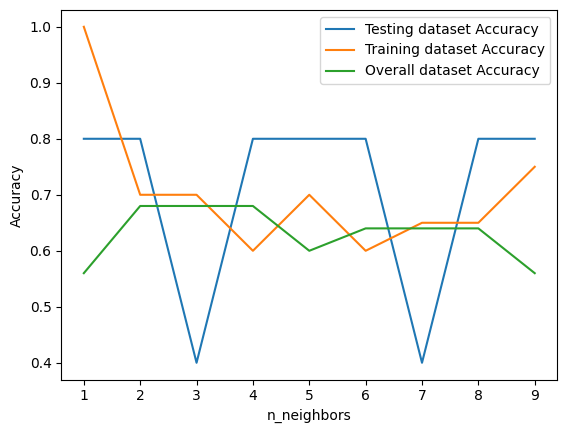

In [ ]:
import matplotlib.pyplot as plt
neighbors = np.arange(1, 10)
train_accuracy = np.empty(len(neighbors))  #creating empty array
test_accuracy = np.empty(len(neighbors))
overall_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, Y_train)
    test_accuracy[i] = knn.score(X_test, Y_test)

    #overall accuracy
    overall_accuracy[i] = knn.score(X,Y)
 
# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
plt.plot(neighbors, overall_accuracy, label = 'Overall dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

**DECISION TREE CLASSIFIER**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
ypred=dt.predict(X_test)

In [ ]:
print("Training Accuracy",dt.score(X_train,Y_train))
print("Testing Accuracy",dt.score(X_test,Y_test))
print("Overall Accuracy:",dt.score(sst.transform(X),Y))

Training Accuracy 1.0
Testing Accuracy 0.6
Overall Accuracy: 0.92


**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,Y_train)

<ipython-input-29-70917fd5b97b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


RandomForestClassifier()

In [ ]:
print("Training Accuracy",rf.score(X_train,Y_train))
print("Testing Accuracy",rf.score(X_test,Y_test))
print("Overall Accuracy:",rf.score(sst.transform(X),Y))

Training Accuracy 1.0
Testing Accuracy 0.6
Overall Accuracy: 0.92


**Evaluation metrics**

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_lr = accuracy_score(Y,model.predict(sst.transform(X)))
accuracy_nb = accuracy_score(Y,nb.predict(sst.transform(X)))
accuracy_knn = accuracy_score(Y,knn.predict(sst.transform(X)))
accuracy_dt = accuracy_score(Y,dt.predict(sst.transform(X)))
accuracy_rf = accuracy_score(Y,rf.predict(sst.transform(X)))

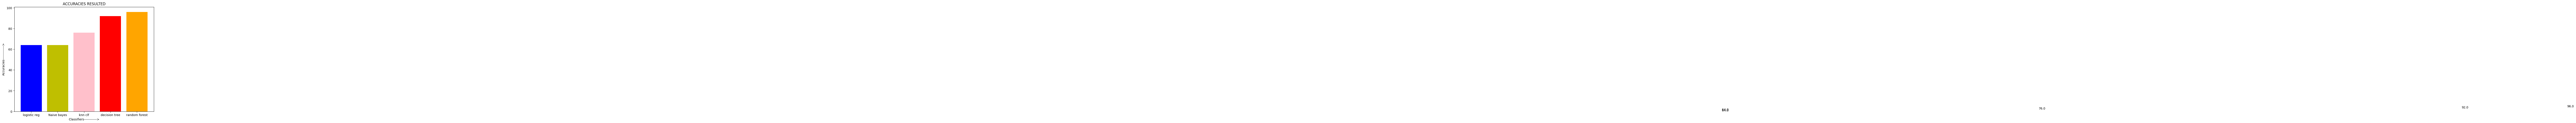

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_axes([0,0,1,1])

algo = ['logistic reg','Naive bayes','knn clf','decision tree','random forest']

accuracy = [accuracy_lr*100,accuracy_nb*100,accuracy_knn*100,accuracy_dt*100,accuracy_rf*100]

ax.bar(algo[0],accuracy[0],color = 'b')

ax.bar(algo[1],accuracy[1],color = 'y')

ax.bar(algo[2],accuracy[2],color = 'pink')

ax.bar(algo[3],accuracy[3],color = 'r')

ax.bar(algo[4],accuracy[4],color = 'orange')
for index, value in enumerate(accuracy):
  plt.text(value,index,str(value))

plt.xlabel('Classifiers------------>')

plt.ylabel('Accuracies------------->')

plt.title('ACCURACIES RESULTED')

plt.show()

In [ ]:
mint=int(input())
maxt=int(input())
avghum=int(input())
rain=int(input())
#inputs=sst.transform([[age,estimatedsal]])
op=rf.predict(sst.transform([[mint,maxt,avghum,rain]]))
print(op)

34
24
53
4
[0]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
